In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Needed function to implement multiple variable regression from scratch 

def predict(w,X,b):
    m = X.shape[0]
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = np.dot(w,X[i])+b
    return y_hat

def cost(y_hat, y):
    m = len(y)
    error=0
    for i in range(m):
        error+= (y[i]-y_hat[i])**2
    cost = error/(2*m)
    return cost

def Gradient(X,y,b,w):
    m,n = X.shape
    derv_w = np.zeros((n,))
    derv_b=0
    for i in range(m):
        err = (np.dot(X[i],w)+b)-y[i]
        derv_b += err
        for j in range(n):
            derv_w[j] += err * X[i,j]
    derv_b = derv_b/ m
    derv_w = derv_w/ m
    return derv_w, derv_b
        
def gradient_descent(w_init, b_init, X, y, epsilon, alpha):
    y_hat = predict(w_init, X, b_init)
    J_wb = cost(y_hat, y)
    w = w_init
    b = b_init
    itr = 0
    J_history=[]
    while J_wb > epsilon:
        derv_w, derv_b = Gradient(X,y,b, w)
        w = w - (alpha * derv_w)
        b = b - (alpha * derv_b)
        y_hat = predict(w, X, b)
        J_wb = cost(y_hat, y)
        if itr<100000:    
            J_history.append(J_wb)  # needed for plotting the learning curve
        itr +=1 
    return w, b, itr, J_history

In [3]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 0
w_init = np.array([ 0, 0, 0, 0])

alpha = 5.0e-7
epsilon = 0.001
best_w, best_b, itr, J_history = gradient_descent(w_init, b_init,X_train, y_train, epsilon, alpha)

In [4]:
print(f"Best values for Weights: {best_w}")
print(f"Best value for b parameters: {best_b}")
y_hat = predict(best_w, X_train, best_b)
J = cost(y_hat, y_train)
print(f"Those weights produce a cost equals: {J}")
print(f"Gradient Decent reached those values after {itr} iterations.")

Best values for Weights: [  0.15452104  23.44029954 -65.605007     1.82278279]
Best value for b parameters: 1.2386298496039263
Those weights produce a cost equals: 0.000999999968114962
Gradient Decent reached those values after 55987122 iterations.


Text(0.5, 0, 'iteration step')

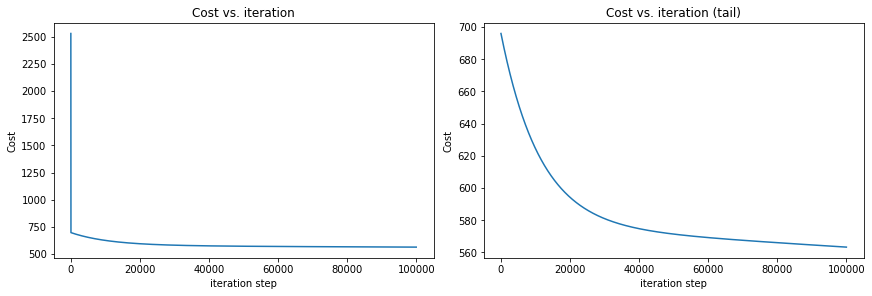

In [5]:
# plot the learning curve which is cost versus iteration to make sure that gradient descent works correct  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
# plt.show()

In [6]:
# Replace cost() and gradient_decent() function with those if you want a regularized implementation of your code, helps you avoide over-fitting
def cost_regularized(y_hat, y, w, lambda_):
    m = len(y)
    error=0
    for i in range(m):
        error+= (y[i]-y_hat[i])**2
    cost = error/(2*m)
    n = len(w)
    reg_term  =0
    for j in range(n):
        reg_term += (w[j]**2)
    reg_term = reg_term* (lambda_/(2*m))
    cost+= reg_term
    return cost

def gradient_descent_regularized(w_init, b_init, X, y, epsilon, alpha):
    y_hat = predict(w_init, X, b_init)
    n = len(w_init)
    J_wb = cost(y_hat, y)
    w = w_init
    b = b_init
    itr = 0
    J_history=[]
    while J_wb > epsilon:
        derv_w, derv_b = Gradient(X,y,b, w)
        for j in range(n):
            derv_w[j] += (lambda_/(2*m)) *w[j]
        w = w - (alpha * derv_w)
        b = b - (alpha * derv_b)
        y_hat = predict(w, X, b)
        J_wb = cost(y_hat, y)
        if itr<100000:    
            J_history.append(J_wb)  # needed for plotting the learning curve
        itr +=1 
    return w, b, itr, J_history

In [7]:
# Checking the implementation of cost_regularized()
np.random.seed(1)  #to generate the same random numbers everyy time when using random.rand for X and w
X = np.random.rand(5,6)
y= np.array([0,1,0,1,0])
w = np.random.rand(6,)-0.5
b = 0.5
y_hat = predict(w, X, b)
lambda_ = 0.7
cost_tmp = cost_regularized(y_hat, y, w, lambda_)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275
